<a href="https://colab.research.google.com/github/gauravvojha/Cognifyz_DataScience_tasks/blob/main/task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import necessary libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset

In [3]:
df = pd.read_csv('/content/restaurant_data.csv')

# Explore the dataset

In [4]:
print(df.head())
print(df.info())

   Restaurant ID         Restaurant Name  Country Code              City  \
0        6317637        Le Petit Souffle           162       Makati City   
1        6304287        Izakaya Kikufuji           162       Makati City   
2        6300002  Heat - Edsa Shangri-La           162  Mandaluyong City   
3        6318506                    Ooma           162  Mandaluyong City   
4        6314302             Sambo Kojin           162  Mandaluyong City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3  Third Floor, Mega Fashion Hall, SM Megamall, O...   
4  Third Floor, Mega Atrium, SM Megamall, Ortigas...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   
2  Edsa Shangri-La, Ortigas, Mandaluyong City   
3      SM 

# Analyze the relationship between the type of cuisine and the restaurant's rating

In [7]:
Cuisines_rating = df.groupby('Cuisines')['Aggregate rating'].mean().sort_values(ascending=False)
print(Cuisines_rating)

Cuisines
Italian, Deli                     4.9
Hawaiian, Seafood                 4.9
American, Sandwich, Tea           4.9
Continental, Indian               4.9
European, Asian, Indian           4.9
                                 ... 
Fast Food, Desserts, Beverages    0.0
Fast Food, Chinese, Burger        0.0
Cafe, French                      0.0
Seafood, Mughlai, North Indian    0.0
Fast Food, Mughlai, Armenian      0.0
Name: Aggregate rating, Length: 1825, dtype: float64


# Identify the most popular cuisines among customers based on the number of votes

In [9]:
Cuisines_votes = df.groupby('Cuisines')['Votes'].sum().sort_values(ascending=False)
print(Cuisines_votes)

Cuisines
North Indian, Mughlai                                               53747
North Indian                                                        46241
North Indian, Chinese                                               42012
Cafe                                                                30657
Chinese                                                             21925
                                                                    ...  
Mithai, North Indian, South Indian, Chinese, Street Food, Bakery        0
Cafe, Tibetan                                                           0
Chinese, Fast Food, Pizza                                               0
Chinese, Italian                                                        0
Seafood, Mughlai, North Indian                                          0
Name: Votes, Length: 1825, dtype: int64


# Visualize the average rating by cuisine

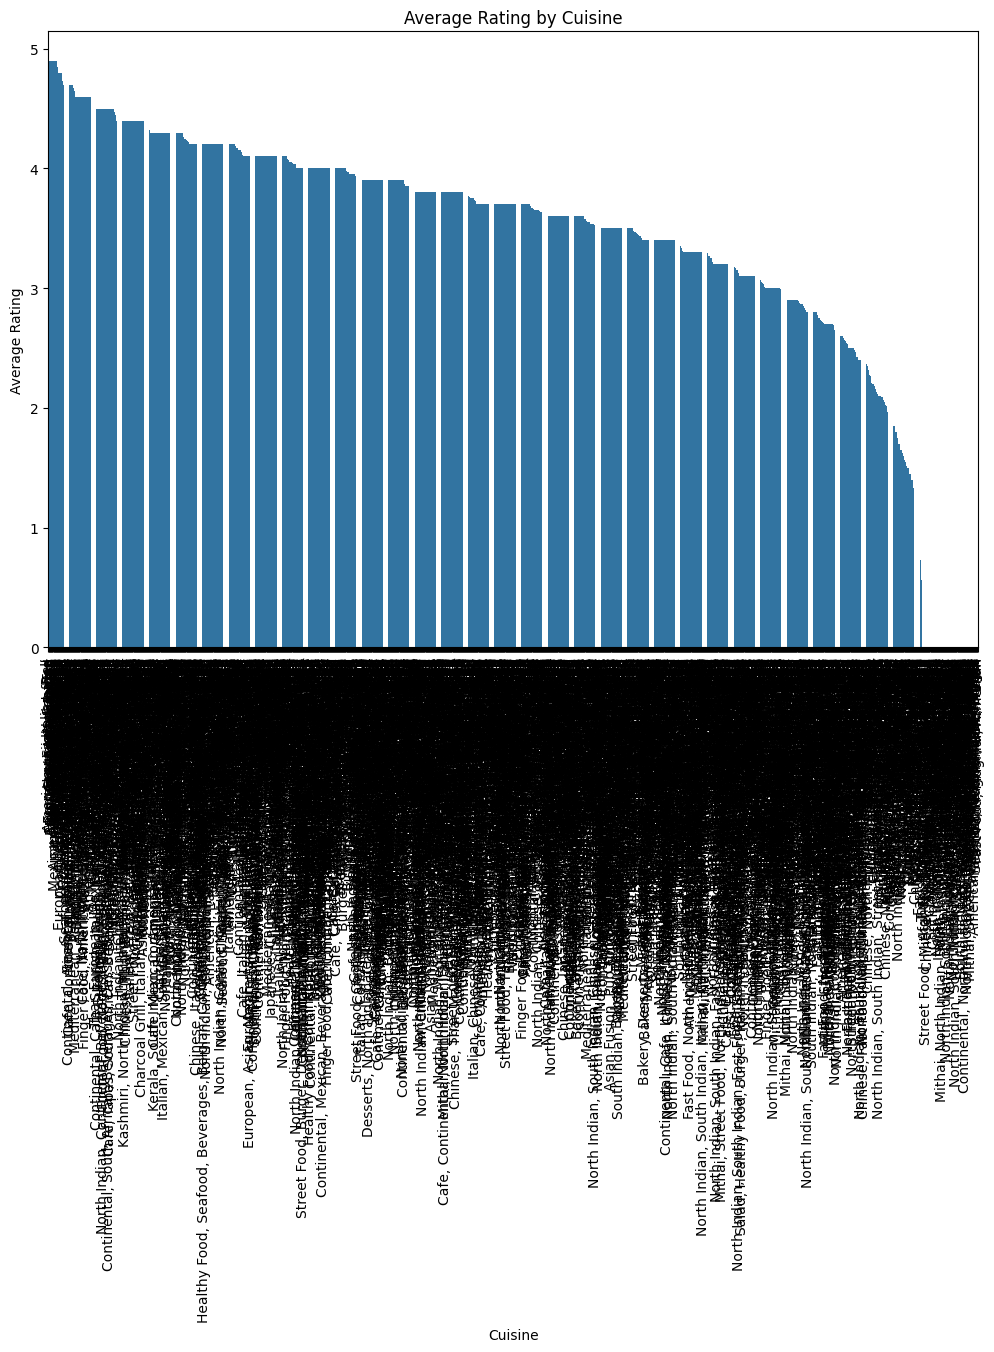

In [11]:
plt.figure(figsize=(12, 8))
sns.barplot(x=Cuisines_rating.index, y=Cuisines_rating.values)
plt.xticks(rotation=90)
plt.title('Average Rating by Cuisine')
plt.xlabel('Cuisine')
plt.ylabel('Average Rating')
plt.show()

# Visualize the total votes by cuisine

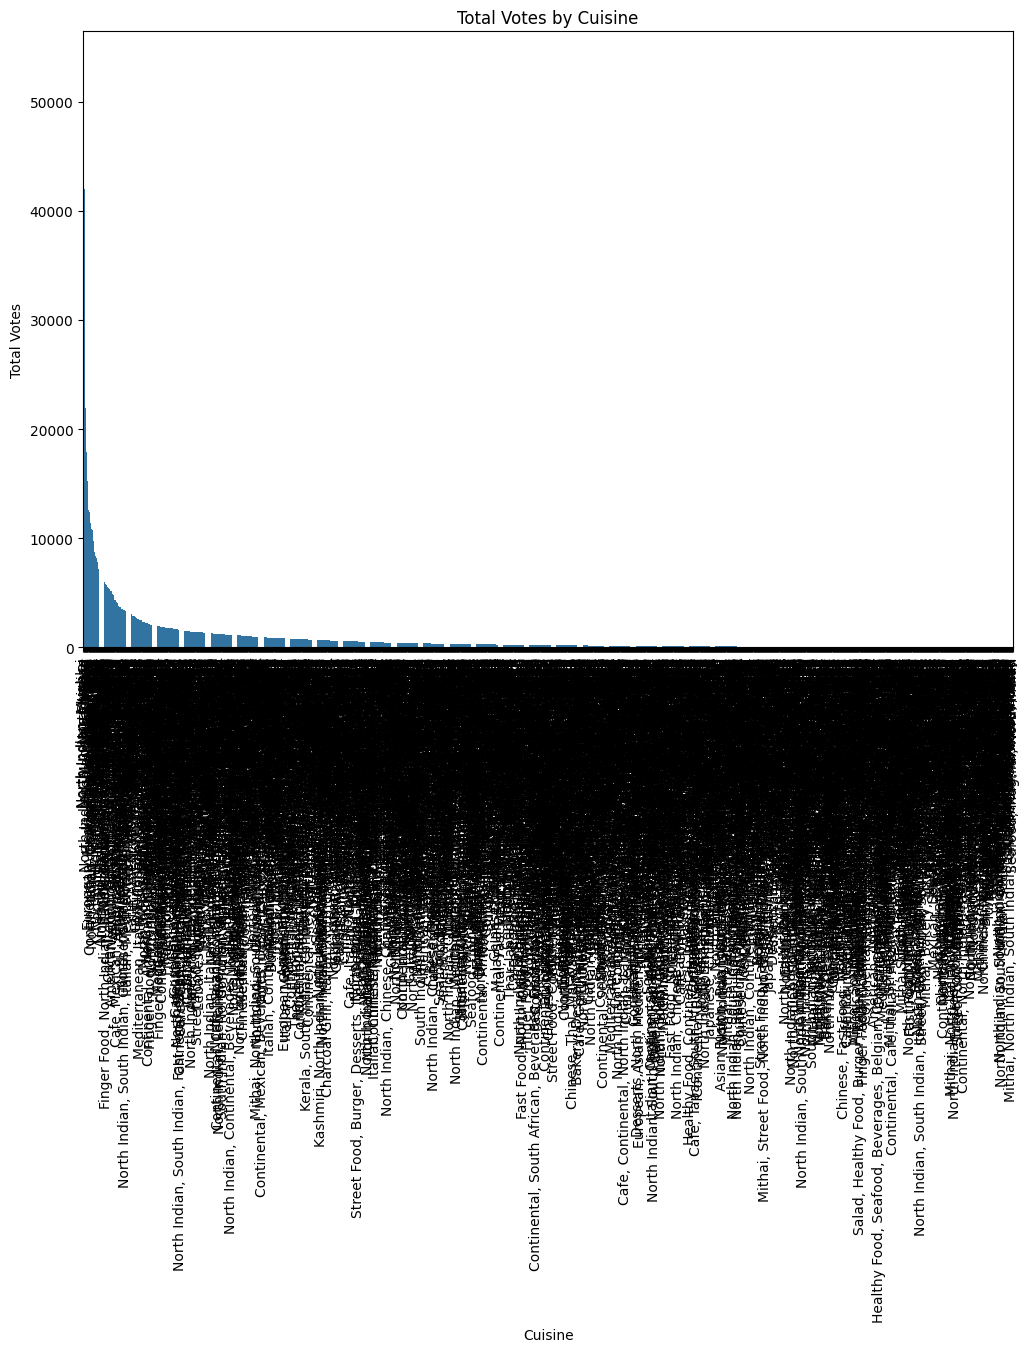

In [12]:
plt.figure(figsize=(12, 8))
sns.barplot(x=Cuisines_votes.index, y=Cuisines_votes.values)
plt.xticks(rotation=90)
plt.title('Total Votes by Cuisine')
plt.xlabel('Cuisine')
plt.ylabel('Total Votes')
plt.show()

# Determine if there are any specific cuisines that tend to receive higher ratings

In [13]:
Cuisines_rating_df = df.groupby('Cuisines').agg({'Aggregate rating': 'mean', 'Votes': 'sum'}).sort_values(by='Aggregate rating', ascending=False)
print(Cuisines_rating_df)


                                Aggregate rating  Votes
Cuisines                                               
Italian, Deli                                4.9   1424
Hawaiian, Seafood                            4.9   1343
American, Sandwich, Tea                      4.9   1457
Continental, Indian                          4.9    641
European, Asian, Indian                      4.9    621
...                                          ...    ...
Fast Food, Desserts, Beverages               0.0      0
Fast Food, Chinese, Burger                   0.0      0
Cafe, French                                 0.0      1
Seafood, Mughlai, North Indian               0.0      0
Fast Food, Mughlai, Armenian                 0.0      0

[1825 rows x 2 columns]


# Visualize the relationship between votes and ratings for different cuisines

In [15]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='Votes', y='Aggregate rating', hue='Cuisines')
plt.title('Votes vs. Aggregate Rating by Cuisine')
plt.xlabel('Votes')
plt.ylabel('Aggregate Rating')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()